# **Home Work Assignment #11**
                                                                                
## ***Temperature & Density Of HII Regions***

##### Author : Spencer Long  
##### Class: Astro 320 Spectroscopy

---
---
---

# Working With The Data:

### Imports:

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import math
from astropy.io import fits
from astropy import units as u

- - - 

### Accessing Fits File Data:

In [2]:
hdul1 = fits.open('/Users/Spencer/Desktop/Spectroscopy320/Spectra_Data/5a.i1613_HII.fits')
hdul2 = fits.open('/Users/Spencer/Desktop/Spectroscopy320/Spectra_Data/5b.n300_HII.fits')

In [3]:
manual1 = hdul1[0].header # Assgining variable to call header data of fits file
manual2 = hdul2[0].header

In [4]:
data1 = hdul1[0].data # Storing Flux density data into memory (will be used for our y axis)
data2 = hdul2[0].data

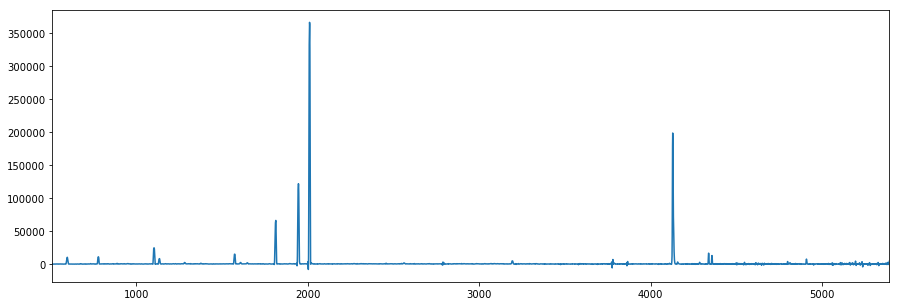

In [5]:
plt.figure(figsize=(15,5))
plt.xlim(data1[0],len(data1))
plt.plot(data1) # Plotting flux data to take a quick look. 

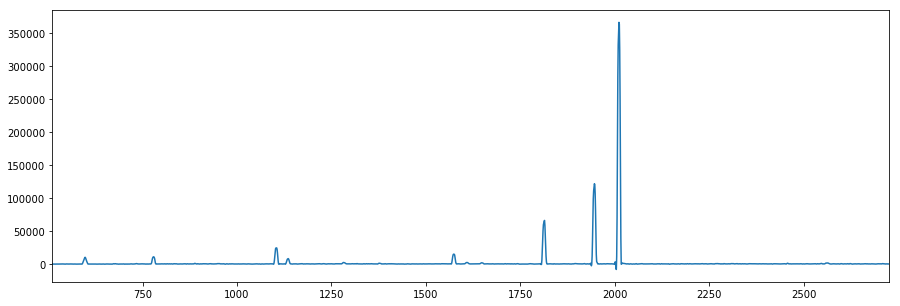

In [6]:
plt.figure(figsize=(15,5))
plt.xlim(data1[0],len(data2))
plt.plot(data1) # Plotting flux data to take a quick look. 

---
### Header Data For Each Fits File: 

In [7]:
# manual1

In [8]:
# manual2

---
### Creating The X Axis:

In [9]:
x1 = np.arange(manual1['CRVAL1'], len(data1) * manual1['CDELT1'] + manual1['CRVAL1'], 0.734)
data1.shape == x1.shape # This line of code verifies that the x axis array is the same shape as the y axis array.

True

In [10]:
x2 = np.arange(manual2['CRVAL1'], len(data2) * manual2['CDELT1'] + manual2['CRVAL1'], manual2['CDELT1'])
data2.shape == x2.shape # This line of code verifies that the x axis array is the same shape as the y axis array.

True

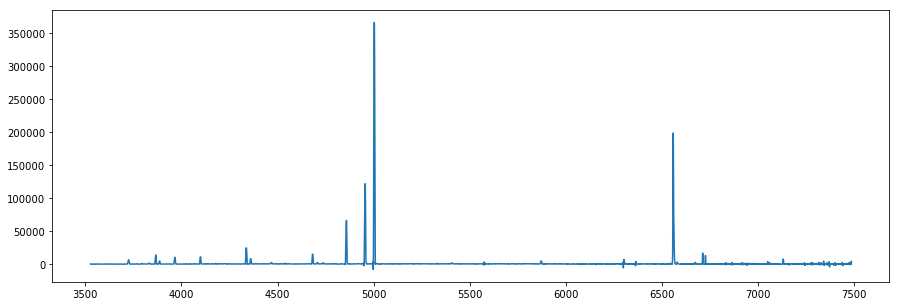

In [11]:
plt.figure(figsize=(15,5))
plt.plot(x1, data1) # plotting our created x and y(data) arrays together

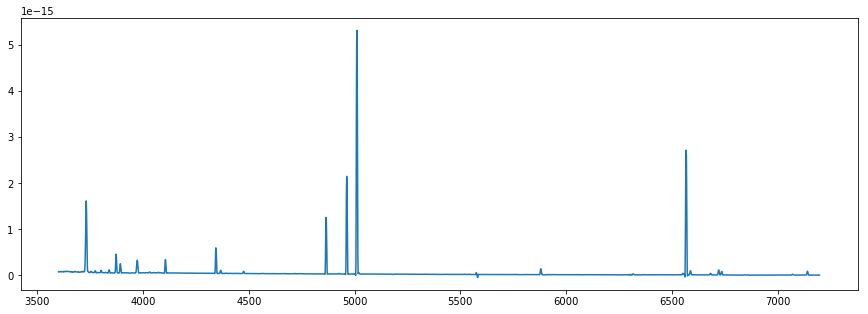

In [63]:
plt.figure(figsize=(15,5))
plt.plot(x2, data2) # plotting our created x and y(data) arrays together

---
# Identifying Lines That Are Prevalent In HII Regions:

### Labels & Data Of Lines:

In [13]:
# line labels for plots and dataframe
lines = [ 
         r'$[OII]$',
         r'$[NeIII]$',
         r'$H\delta$',
         r'$H\gamma$',
         r'$[OIII]$',
         r'$H\beta$',
         r'$[OIII]$',
         r'$[OIII]$',
         r'$[NII]$',
         r'$[NII]$',
         r'$H\alpha$',
         r'$[NII]$',
         r'$[SII]$',
         r'$[SII]$',
        ] 

# Wavelengths for Balmer lines
wl = [
      3726,
      3869,
      4101,
      4340,
      4363,
      4861,
      4959,
      5007,
      5755,
      6548,
      6562,
      6584,
      6716,
      6731
     ]  

### Plotting Spectra With Identified Lines:

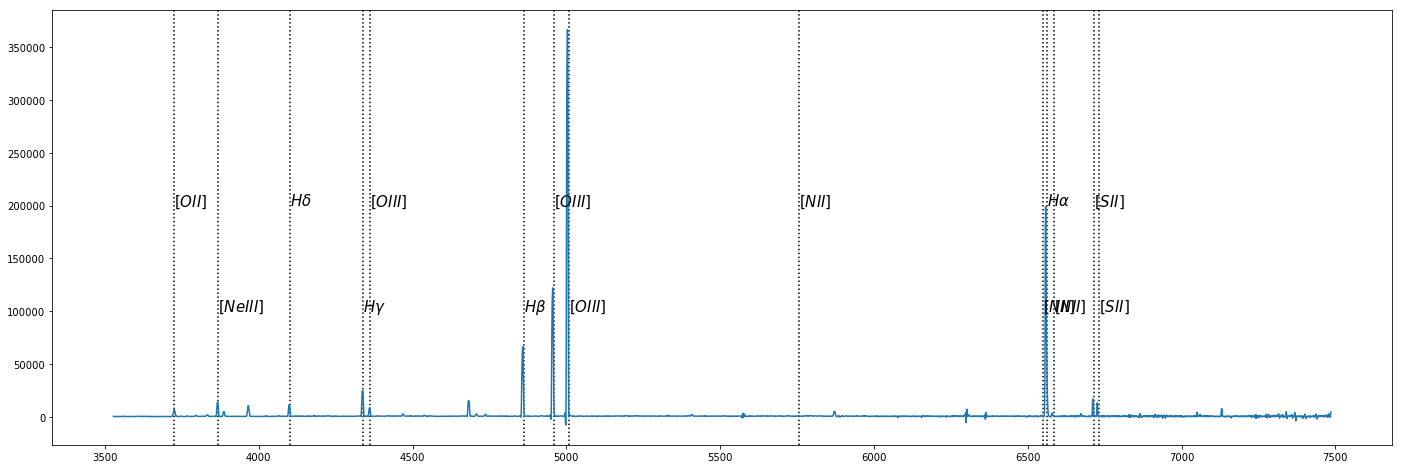

In [14]:
plt.figure(figsize=(24,8))

for i in range(len(lines)):
    
    if i in range(0,len(lines),2):
        plt.axvline(x = wl[i], color = 'k', ls=':')
        plt.annotate(lines[i], xy=(wl[i],200000), xytext=(wl[i],200000), fontsize=15)
    if i % 2 != 0:
        plt.axvline(x = wl[i], color = 'k', ls=':')
        plt.annotate(lines[i], xy=(wl[i],100000), xytext=(wl[i],100000), fontsize=15)

plt.plot(x1,data1)
plt.show()

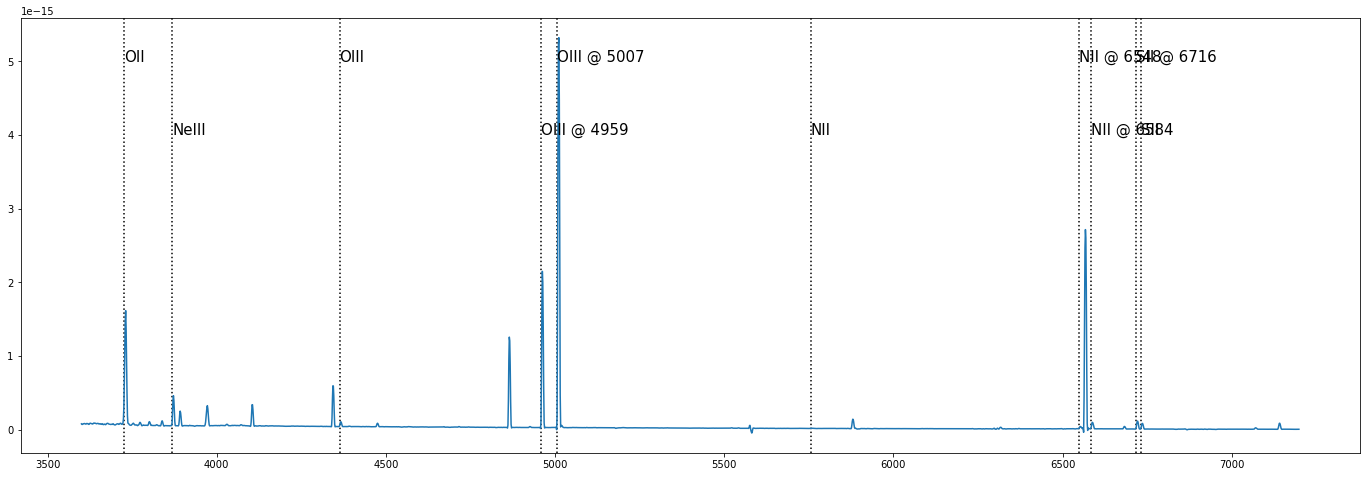

In [29]:
plt.figure(figsize=(24,8))

for i in range(len(lines)):
    
    if i in range(0,len(lines),2):
        plt.axvline(x = wl[i], color = 'k', ls=':')
        plt.annotate(lines[i], xy=(wl[i],5e-15), xytext=(wl[i],5e-15), fontsize=15)
    if i % 2 != 0:
        plt.axvline(x = wl[i], color = 'k', ls=':')
        plt.annotate(lines[i], xy=(wl[i],4e-15), xytext=(wl[i],4e-15), fontsize=15)

plt.plot(x2, data2)
plt.show()

---
# Creating Dataframes Needed For Calculations

### Labels & Data Of Lines:

In [16]:
# Lines and wavelengths needed for line ratios:

lines = [ 
         'OII',
         'NeIII',
         'OIII',
         'OIII @ 4959',
         'OIII @ 5007',
         'NII',
         'NII @ 6548',
         'NII @ 6584',
         'SII @ 6716',
         'SII',
        ] 

# Wavelengths for Balmer lines
wl = [
      3726,
      3869,
      4363,
      4959,
      5007,
      5755,
      6548,
      6584,
      6716,
      6731
     ]  

### Data Frames:

In [53]:
# Central wavelength that was calculated using Pyraf's splot feature with a gaussian fit for each Balmer line   
flux1 = [42322, 42761, 45649, 729953, 2.109E6, 2653, 6765, 13237, 51404, 39736]
indexx = ["Rest Wavelength " r'$(Angstroms)$' ':','Flux:']

# Creating a dataframe to place all of our calculated data for each individual Balmer line. 
df1 = pd.DataFrame(data=[wl,flux1], index=indexx, columns=lines)
df1

,OII,NeIII,OIII,OIII @ 4959,OIII @ 5007,NII,NII @ 6548,NII @ 6584,SII @ 6716,SII
Rest Wavelength $(Angstroms)$:,3726,3869,4363,4959,5007.0,5755,6548,6584,6716,6731
Flux:,42322,42761,45649,729953,2109000.0,2653,6765,13237,51404,39736


In [37]:
# Central wavelength that was calculated using Pyraf's splot feature with a gaussian fit for each Balmer line   
flux2 = [1.01E-14, 2.11E-15, 3.63E-16, 1.16E-14, 3.19E-14, 2.33E-17, 1.73E-16, 5.40E-16, 6.61E-16, 4.73E-16]

# Creating a dataframe to place all of our calculated data for each individual Balmer line. 
df2 = pd.DataFrame(data=[wl,flux2], index=indexx, columns=lines)
df2

,OII,NeIII,OIII,OIII @ 4959,OIII @ 5007,NII,NII @ 6548,NII @ 6584,SII @ 6716,SII
Rest Wavelength $(Angstroms)$:,3.726000e+03,3.869000e+03,4.363000e+03,4.959000e+03,5.007000e+03,5.755000e+03,6.548000e+03,6.584000e+03,6.716000e+03,6.731000e+03
Flux:,1.010000e-14,2.110000e-15,3.630000e-16,1.160000e-14,3.190000e-14,2.330000e-17,1.730000e-16,5.400000e-16,6.610000e-16,4.730000e-16


---
# Calculating The Temperature Diagnostic Line Ratio:



### **Spectra: i1613_HII**  

 
#### Find the line ratio of: [OIII]$\lambda5007/$[OIII]$\lambda4959$

In [38]:
flux1[4]/flux1[3]

2.8892271146224484

#### Find the line ratio of: [NII]$\lambda6583/$[NII]$\lambda6548$

In [39]:
# Note: These lines are very non defined for this spectra

flux1[7]/flux1[6]

1.956688839615669

### **Spectra: n300_HII**  

#### Find the line ratio of: [OIII]$\lambda5007/$[OIII]$\lambda4959$

In [40]:
flux2[4]/flux2[3]

2.75

#### Find the line ratio of: [NII]$\lambda6583/$[NII]$\lambda6548$

In [41]:
flux2[7]/flux2[6]

3.121387283236994

---
# Calculating The Temperature & Density Of Each Object

### Temperature:

For [OIII]: $\frac{F(\lambda4363)}{F(\lambda4959)+F(\lambda5007)} = 0.132 \cdot e^{\frac{−32970}{T}}$

For [NII]: $\frac{F(\lambda5755)}{F(\lambda6548) + F(\lambda6583)} = 0.123 \cdot e^{\frac{−25000}{T}}$

Solving for T (temperature) for each we find that the equations for the temperatures are:

Temperature for [OIII]: $T = \frac{-32970}{ln(\frac{F(\lambda4363)}{F(\lambda4959)+F(\lambda5007)})+2.02495}$

Temperature for [NII]: $T = \frac{-25000}{ln(\frac{F(\lambda5755)}{F(\lambda6548)+F(\lambda6583)})+2.09557}$


### [OIII] Temp for i1613 HII:

In [42]:
# OIII Temp for i1613_HII
f1 = flux1[2] / (flux1[3] + flux1[4])
t1 = -32970 / (math.log(f1) + 2.02495)
t1

15660.781672332421

### [NII] Temp for i1613 HII:

Can not complete this calculation due to not being able to measure [NII] lines for this spectrum.

### [OIII] Temp for n300 HII:

In [48]:
# OIII Temp for n300 HII:
f2 = flux2[2] / (flux2[3] + flux2[4])
t2 = -32970 / (math.log(f2) + 2.02495)
t2

11940.61901777934

### [NII] Temp for n300 HII:

In [47]:
# NII Temp for n300 HII
f3 = flux2[5] / (flux2[6] + flux2[7])
t3 = -25000 / (math.log(f3) + 2.09557)
t3

18861.40403640384

---

# Calculating The Electron Density For Each Object Using [SII] Lines

### Electron Density For [SII]:

$ \frac{F(6717)}{F(6731)} = 1.49 \cdot \frac{1 + 3.77x}{1 + 12.8x}$

Where x is equal to

$x = 10^{-2} \cdot \frac{n_e}{T_e^{1/2}}$

$n_e$ is the electron density and $T$ is temperature.

Plugging x into the above equation and solving for $n_e$ will yield us our electron density that we are looking for:






### $n_e = \frac{-7.8125 \cdot (\frac{F(6717)}{F(6731)}- 1.49) \cdot T^{1/2}}{\frac{F(6717)}{F(6731)}-0.438852}$

### [OIII] Density for i1613 HII:

In [68]:
ne1 = (-7.8125*((flux1[-2]/flux1[-1])-1.49)* t1**(1/2))/((flux1[-2]/flux1[-1])-0.438852)
ne1

224.59328360223648

### [OIII] Temp for n300 HII:

In [69]:
ne2 = (-7.8125*((flux2[-2]/flux2[-1])-1.49)* t2**(1/2))/((flux2[-2]/flux2[-1])-0.438852)
ne2

82.4093422773897

### [NII] Temp for n300 HII:

In [71]:
ne3 = (-7.8125*((flux2[-2]/flux2[-1])-1.49)* t3**(1/2))/((flux2[-2]/flux2[-1])-0.438852)
ne3

103.57383004055775